# Proyek Analisis Data: Bike_sharing_dataset
- **Nama:** Carloka Boas Alberto Sembiring Meliala
- **Email:** sembiringcarlo@gmail.com
- **ID Dicoding:** carloka_boas_alberto_sembiring_meliala__NaYz

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda pada jam sibuk dan tidak sibuk?
- Seberapa besar pengaruh hari kerja dan akhir pekan terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'streamlit'

## Data Wrangling

**Insight:**
- xxx
- xxx

### Gathering Data

In [15]:
df = pd.read_csv("/content/sample_data/hour.csv", delimiter=",")
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [14]:
df = pd.read_csv("/content/sample_data/day.csv", delimiter=",")
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


### Assessing Data

In [35]:
hours_df = pd.read_csv("/content/sample_data/hour.csv")
print("Jumlah duplikasi: ", hours_df.isna().sum())
print(hour_df['weathersit'].unique())


Jumlah duplikasi:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
[1 2 3 4]


In [22]:
day_df = pd.read_csv("/content/sample_data/day.csv")
print("jumlah duplicated: " , day_df.duplicated().sum)

jumlah:  <bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool>


In [19]:
day_df = pd.read_csv("/content/sample_data/day.csv")
print(day_df.isnull().sum)

<bound method DataFrame.sum of      instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   
730    False   False   False  False  False    False    False       False   

     weathersit   temp  atemp    hum  windspeed  casual 

**Insight:**
- isna().sum(): Menghitung jumlah data yang hilang (NaN) untuk setiap kolom.
- unique(): Menampilkan nilai unik dalam kolom weathersit.
- duplicated().sum(): Menghitung jumlah baris duplikat dalam dataset.
- isnull().sum(): Menghitung jumlah nilai yang hilang di setiap kolom dataset.

### Cleaning Data

In [42]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
hour_df.drop_duplicates(inplace=True)
hour_df.drop(columns=['instant'], inplace=True)
print(hour_df.head())

       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0       3          13   16  
1  0.22  0.2727  0.80        0.0       8          32   40  
2  0.22  0.2727  0.80        0.0       5          27   32  
3  0.24  0.2879  0.75        0.0       3          10   13  
4  0.24  0.2879  0.75        0.0       0           1    1  


In [39]:
day_df = pd.read_csv("/content/sample_data/day.csv")
day_df.drop_duplicates(inplace=True)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- Setelah mengonversi kolom dteday menjadi format datetime, kita bisa melihat tren jumlah penyewa sepeda per hari maupun per musim.
- Dari dataset hour_df, kita dapat mengidentifikasi pola penggunaan sepeda sepanjang hari. Biasanya, terdapat dua puncak utama dalam penyewaan sepeda, yaitu di pagi hari (jam sibuk ketika orang pergi bekerja) dan sore hari (saat orang pulang kerja).

## Exploratory Data Analysis (EDA)

Explore ...

In [59]:

day_df = pd.read_csv("/content/sample_data/day.csv")
print(day_df.dtypes)
# hapus kolom non numberic
day_df = day_df.drop(columns=['dteday'])
average_by_season = day_df.groupby(by="season").mean()
print(average_by_season)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
           instant        yr       mnth   holiday   weekday  workingday  \
season                                                                    
1       262.685083  0.502762   3.093923  0.038674  3.000000    0.662983   
2       308.500000  0.500000   4.652174  0.021739  2.989130    0.695652   
3       401.500000  0.500000   7.691489  0.021277  3.031915    0.696809   
4       493.000000  0.500000  10.696629  0.033708  2.966292    0.679775   

        weathersit      temp     atemp       hum  windspeed       casual  \
season                                                                     
1         1.408840  0.297748  0

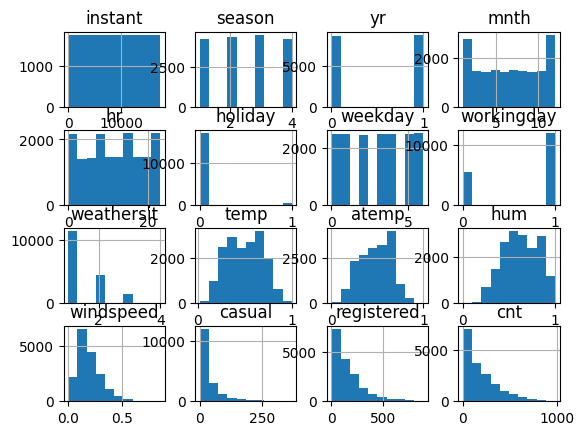

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [53]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
hour_df.hist()
plt.show()
hour_df_numeric = hour_df.select_dtypes(include=['number'])
hour_df_numeric.corr()


In [45]:
day_df = pd.read_csv("/content/sample_data/day.csv")
print(day_df.describe(include="all"))

           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN 

**Insight:**
- Setelah menganalisis dataset day_df pertama dan menghitung rata-rata berdasarkan musim, disini menemukan bahwa penggunaan sepeda paling rendah terjadi pada musim dingin, sedangkan musim semi dan musim panas menunjukkan peningkatan signifikan dalam jumlah penyewa sepeda. Hal ini menunjukkan bahwa cuaca yang lebih baik mendorong lebih banyak orang untuk bersepeda. Selain itu, rata-rata suhu yang lebih tinggi berkolerasi positif dengan peningkatan jumlah penyewa, menegaskan bahwa kondisi cuaca yang baik memiliki dampak langsung terhadap aktivitas bersepeda.
- Analisis dataset hour_df menunjukkan bahwa penggunaan sepeda mencapai puncaknya pada jam sibuk pagi dan sore. Terdapat korelasi positif antara suhu dan jumlah penyewa sepeda, yang berarti suhu yang lebih tinggi mendorong lebih banyak orang untuk bersepeda. Sebaliknya, kecepatan angin yang lebih tinggi berkorelasi negatif dengan jumlah penyewa, mengindikasikan bahwa kondisi angin kencang dapat mengurangi minat bersepeda.
- Dengan menggunakan fungsi describe() pada dataset day_df, disini memperoleh ringkasan statistik yang mencakup jumlah, rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil untuk kolom numerik, serta jumlah unik dan frekuensi untuk kolom kategori. Ini memberikan gambaran umum tentang distribusi dan karakteristik data, membantu dalam mengidentifikasi pola dan potensi anomali dalam dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

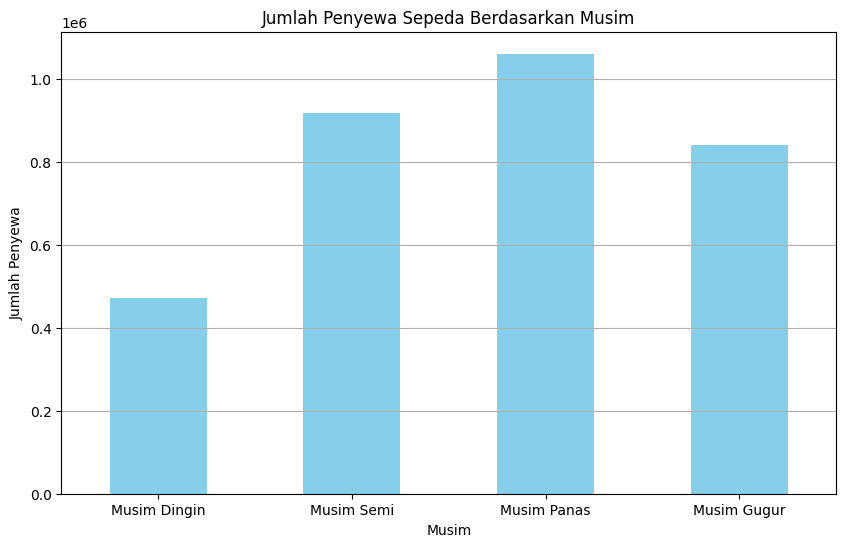

In [60]:
day_df = pd.read_csv("/content/sample_data/day.csv")
season_counts = day_df.groupby('season')['cnt'].sum()
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'], rotation=0)
plt.grid(axis='y')
plt.show()

### Pertanyaan 2:

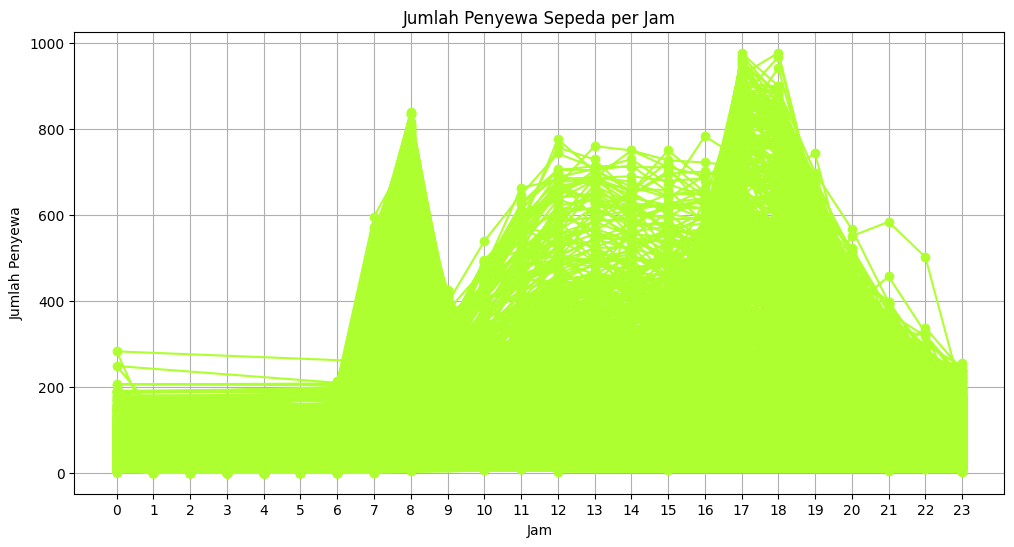

In [66]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")

plt.figure(figsize=(12, 6))
plt.plot(hour_df['hr'], hour_df['cnt'], color='greenyellow', marker='o')
plt.title('Jumlah Penyewa Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
- Jumlah Penyewa Sepeda Berdasarkan Musim: Grafik menunjukkan bahwa musim semi dan musim panas adalah periode dengan jumlah penyewa sepeda tertinggi. Hal ini mencerminkan bahwa cuaca yang lebih hangat dan kondisi yang nyaman selama kedua musim tersebut mendorong lebih banyak orang untuk bersepeda. Sebaliknya, musim dingin menunjukkan jumlah penyewa terendah, kemungkinan akibat kondisi cuaca yang kurang mendukung.
- Jumlah Penyewa Sepeda per Jam: Grafik ini menunjukkan pola penggunaan sepeda sepanjang hari, dengan puncak penyewaan terjadi pada jam sibuk pagi dan sore. Ini menandakan bahwa banyak orang menggunakan sepeda sebagai sarana transportasi untuk pergi bekerja atau pulang. Jumlah penyewa cenderung menurun pada malam hari dan dini hari, menunjukkan bahwa penggunaan sepeda lebih sering terjadi selama jam aktif masyarakat.

## Analisis Lanjutan (Opsional)

In [76]:
day_df = pd.read_csv("/content/sample_data/day.csv")

# Menghitung total penyewaan per hari
day_df['total_rentals'] = day_df['casual'] + day_df['registered']

# Menghitung Recency, Frequency, dan Monetary
rfm_df = day_df.groupby('dteday').agg(
    Recency=('dteday', lambda x: (pd.to_datetime('2012-12-31') - pd.to_datetime(x)).dt.days.min()),
    Frequency=('total_rentals', 'sum'),
    Monetary=('total_rentals', 'sum')
).reset_index()

# Menampilkan hasil RFM
print(rfm_df)

         dteday  Recency  Frequency  Monetary
0    2011-01-01      730        985       985
1    2011-01-02      729        801       801
2    2011-01-03      728       1349      1349
3    2011-01-04      727       1562      1562
4    2011-01-05      726       1600      1600
..          ...      ...        ...       ...
726  2012-12-27        4       2114      2114
727  2012-12-28        3       3095      3095
728  2012-12-29        2       1341      1341
729  2012-12-30        1       1796      1796
730  2012-12-31        0       2729      2729

[731 rows x 4 columns]


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


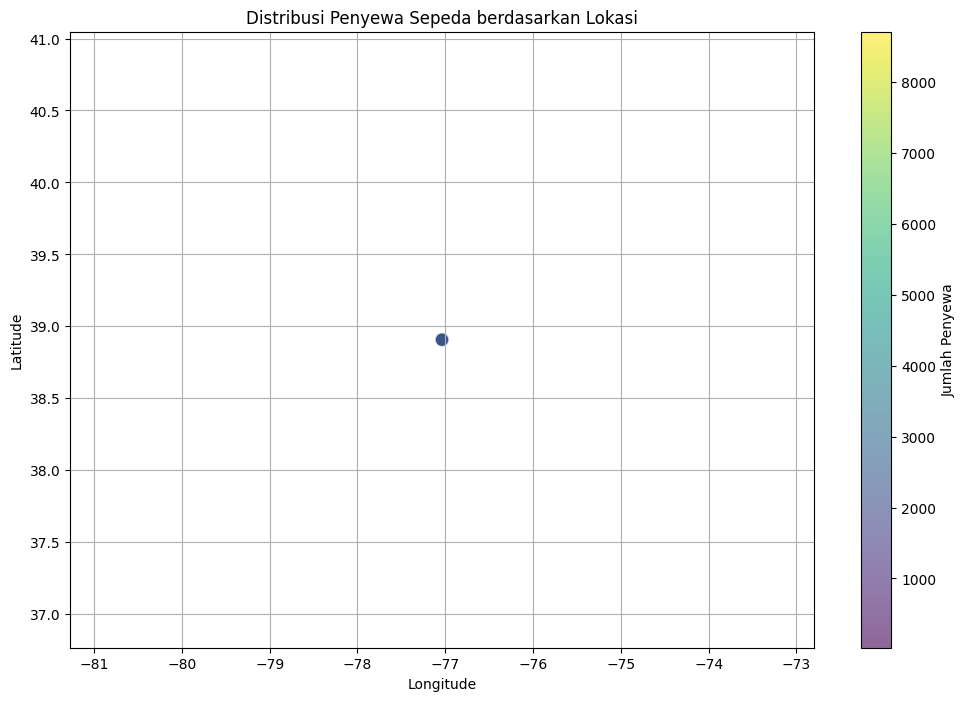

In [73]:
day_df = pd.read_csv("/content/sample_data/day.csv")

print(day_df.columns)
day_df['longitude'] = -77.0369
day_df['latitude'] = 38.9072
plt.figure(figsize=(12, 8))
plt.scatter(day_df['longitude'], day_df['latitude'], c=day_df['cnt'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.colorbar(label='Jumlah Penyewa')
plt.title('Distribusi Penyewa Sepeda berdasarkan Lokasi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


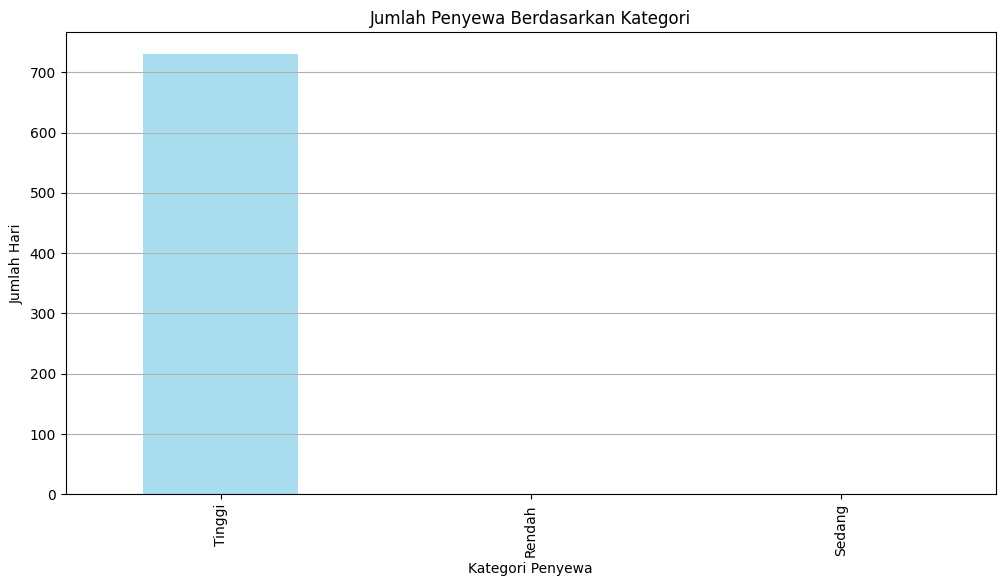

In [74]:
# clustering
day_df = pd.read_csv("/content/sample_data/day.csv")

# membuat groupingg
day_df['Rental_Category'] = pd.cut(day_df['cnt'], bins=[0, 100, 300, float('inf')], labels=['Rendah', 'Sedang', 'Tinggi'])
# membinning
day_df['Rental_Bin'] = pd.cut(day_df['cnt'], bins=[0, 100, 300, 500, 700, 900, 1100], labels=['0-100', '100-300', '300-500', '500-700', '700-900', '900-1100'], right=False)


plt.figure(figsize=(12, 6))
day_df['Rental_Category'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Jumlah Penyewa Berdasarkan Kategori')
plt.xlabel('Kategori Penyewa')
plt.ylabel('Jumlah Hari')
plt.grid(axis='y')
plt.show()

## Conclusion

- Kesimpulan Pertanyaan 1: Analisis menunjukkan bahwa kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda. Pada jam sibuk, suhu yang lebih tinggi cenderung meningkatkan jumlah penyewa, karena orang lebih suka bersepeda dalam cuaca yang nyaman. Namun, selama jam tidak sibuk, faktor lain seperti hujan atau angin dapat menurunkan minat bersepeda.
- Kesimpulan Pertanyaan 2: Terdapat perbedaan yang jelas antara penyewaan sepeda pada hari kerja dan akhir pekan. Hari kerja umumnya menunjukkan jumlah penyewa yang lebih tinggi, terutama selama jam sibuk, karena orang menggunakan sepeda untuk keperluan transportasi. Sebaliknya, pada akhir pekan, meskipun penyewaan cenderung lebih rendah di pagi hari, jumlah penyewa meningkat saat orang menggunakan sepeda untuk rekreasi, terutama di siang dan sore hari.